In [8]:
#εγκατάσταση ppscore
!pip install ppscore

In [9]:
#εισαγωγή βιβλιοθηκών και δημιουργία δεδομένων
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns

df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]


In [15]:
#υπολογισμός pps όπου Χ προβλέπει Υ
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.6705435283563496,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.020536750952486,
 'model_score': 0.33622243715148087,
 'model': DecisionTreeRegressor()}

In [19]:
#υπολογισμός pps σε όλα τα κελιά
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.247544,0.336274,DecisionTreeRegressor()
2,x,y,0.670544,regression,True,mean absolute error,1.020537,0.336222,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.997836,1.323691,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.020537,1.323018,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.997836,1.086413,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.247544,0.274594,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<Axes: xlabel='x', ylabel='ppscore'>

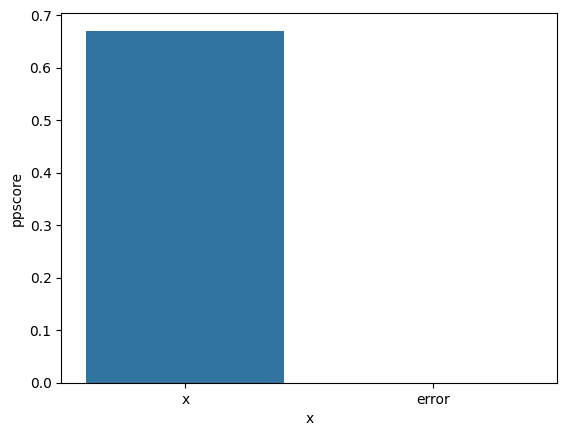

In [20]:
#παρουσίαση αποτελεσμάτων σε πίνακες
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

<Axes: xlabel='x', ylabel='y'>

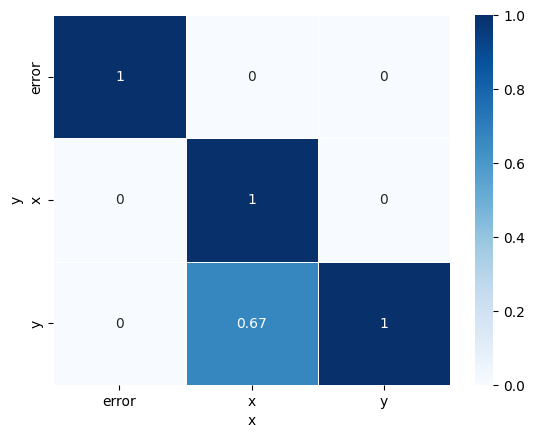

In [21]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)